# Proyecto MLB: Detección de Estadísticas Anómalas para Apuestas

**Objetivo:** Desarrollar un modelo capaz de identificar y predecir estadísticas de jugadores o equipos en la MLB que se desvíen significativamente de las expectativas generales. La idea es encontrar "outliers" o tendencias no evidentes que puedan ofrecer ventajas en el ámbito de las apuestas deportivas, enfocándonos más en predicciones específicas que en el resultado final del partido (quién gana o pierde).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones para mejorar la visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Librerías importadas correctamente.")

# Instalamos pybaseball si no está disponible
# En un entorno de Colab, el ! es para ejecutar comandos de shell.
# Si estás en un Jupyter local y ya lo tienes, puedes comentar esta línea.
#!pip install pybaseball

# Verificamos que se haya instalado y la importamos
try:
    from pybaseball import statcast
    print(f"pybaseball importado correctamente.")
except ImportError as e:
    print(f"Error importando pybaseball: {e}")
    print("Asegúrate de que la instalación con !pip install pybaseball fue exitosa.")

Librerías importadas correctamente.
pybaseball importado correctamente.


In [4]:
from pybaseball import statcast

# Definimos un rango de fechas pequeño para la prueba inicial
# Por ejemplo, los primeros 3 días de mayo de la temporada actual o una temporada reciente si la actual no ha avanzado mucho.
# Ajusta las fechas según sea necesario si no hay datos o quieres explorar un periodo específico.
start_date = '2024-05-01'
end_date = '2024-05-03'

print(f"Intentando descargar datos de Statcast desde {start_date} hasta {end_date}...")

# Intentamos la descarga de datos
try:
    # pybaseball puede tardar un poco y a veces necesita reintentos o ajustes en las fechas
    # si hay problemas con los servidores de MLB.
    df_statcast = statcast(start_dt=start_date, end_dt=end_date)
    
    if not df_statcast.empty:
        print(f"Datos de Statcast descargados exitosamente. Forma del DataFrame: {df_statcast.shape}")
        print("Primeras filas del DataFrame:")
        # Mostramos las primeras filas y la información general del DataFrame
        # Usamos display() para una mejor visualización en Jupyter si el output es grande
        from IPython.display import display
        display(df_statcast.head())
        
        print("\nInformación del DataFrame:")
        df_statcast.info()
    else:
        print("No se descargaron datos. El DataFrame está vacío.")
        print("Posibles razones: No hubo juegos en esas fechas, problemas de conexión, o la librería necesita una actualización.")
        print("Intenta con un rango de fechas diferente o verifica la conexión.")

except Exception as e:
    print(f"Ocurrió un error al descargar los datos de Statcast: {e}")
    print("Esto puede deberse a problemas de red, cambios en la API de MLB, o que no haya juegos en el rango de fechas seleccionado.")
    print("Prueba con otro rango de fechas o revisa la documentación de pybaseball para posibles soluciones.")

Intentando descargar datos de Statcast desde 2024-05-01 hasta 2024-05-03...
This is a large query, it may take a moment to complete


  0%|          | 0/3 [00:00<?, ?it/s]c:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 33%|███▎      | 1/3 [00:01<00:02,  1.19s/it]c:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 67%|██████▋   | 2/3 [00:01<00:00,  1.39it/s]c:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\pybaseball\datahelpers\postprocessing.py:5

Datos de Statcast descargados exitosamente. Forma del DataFrame: (10315, 118)
Primeras filas del DataFrame:


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
3390,FF,2024-05-03,97.6,-1.07,6.18,"Brito, Jhony",666971,666745,strikeout,swinging_strike,...,1,1.22,0.98,0.98,55.0,-0.614349,30.269622,19.941781,39.750188,10.237777
3524,CH,2024-05-03,91.0,-0.94,6.07,"Brito, Jhony",666971,666745,NaN,ball,...,1,2.1,1.21,1.21,55.6,<NA>,<NA>,<NA>,<NA>,<NA>
3605,FF,2024-05-03,96.5,-1.07,6.29,"Brito, Jhony",666971,666745,NaN,ball,...,1,1.19,0.68,0.68,61.2,<NA>,<NA>,<NA>,<NA>,<NA>
3754,CH,2024-05-03,90.1,-1.29,6.09,"Brito, Jhony",666971,666745,NaN,foul,...,1,2.04,1.27,1.27,55.8,20.160182,-22.407019,38.985388,26.474178,42.172734
3817,SI,2024-05-03,96.5,-1.15,6.23,"Brito, Jhony",666971,666745,NaN,foul,...,1,1.42,1.24,1.24,58.6,11.24805,3.893382,36.647957,36.082191,25.875289



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 10315 entries, 3390 to 4080
Columns: 118 entries, pitch_type to intercept_ball_minus_batter_pos_y_inches
dtypes: Float64(42), Int64(59), datetime64[ns](1), object(16)
memory usage: 10.4+ MB


Realizaremos una exploración inicial para entender mejor las características de los datos de Statcast.
Comenzaremos con un resumen estadístico para las columnas numéricas y luego revisaremos los valores faltantes.

In [6]:
# Mostrar todas las columnas en los outputs de pandas (útil para el describe)
pd.set_option('display.max_columns', None)

print("Resumen estadístico de las columnas numéricas:")
# Usamos .select_dtypes para incluir solo los tipos numéricos (incluyendo los nullable de Pandas)
# y excluimos los booleanos si los hubiera, aunque no parece haberlos.
numeric_cols = df_statcast.select_dtypes(include=[np.number, 'Float64', 'Int64']).columns
display(df_statcast[numeric_cols].describe().transpose())

print("\nPorcentaje de valores faltantes por columna (solo columnas con faltantes):")
missing_percentage = df_statcast.isnull().sum() * 100 / len(df_statcast)
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
if not missing_percentage_sorted.empty:
    display(missing_percentage_sorted)
else:
    print("No hay columnas con valores faltantes significativos en esta muestra.")

# Identificar columnas de tipo 'object' para posible conversión a categóricas o revisión
print("\nColumnas de tipo 'object' y sus valores únicos (primeros N para brevedad):")
object_cols = df_statcast.select_dtypes(include='object').columns
for col in object_cols:
    unique_count = df_statcast[col].nunique()
    print(f"Columna '{col}': {unique_count} valores únicos")
    if unique_count < 20: # Mostrar ejemplos solo si no son demasiados
        print(df_statcast[col].value_counts(dropna=False).to_string())
    else:
        print(df_statcast[col].value_counts(dropna=False).head(5).to_string()) # Muestra los 5 más comunes
    print("-" * 30)

Resumen estadístico de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
release_speed,10315.0,88.92953,5.790826,66.9,84.7,89.7,93.7,102.7
release_pos_x,10315.0,-0.793289,1.825248,-4.31,-2.08,-1.37,-0.155,4.45
release_pos_z,10315.0,5.769127,0.545576,0.93,5.45,5.8,6.13,7.31
batter,10315.0,641170.3492,50046.372316,453568.0,621035.0,663538.0,670541.0,808982.0
pitcher,10315.0,632738.307319,57837.727878,434378.0,605397.0,656638.0,670950.0,808967.0
...,...,...,...,...,...,...,...,...
attack_angle,4552.0,9.219463,11.830244,-81.580806,2.116887,9.633683,16.96602,68.455653
attack_direction,4552.0,-0.546251,19.808287,-171.761402,-12.718731,0.100636,12.106657,173.965667
swing_path_tilt,4552.0,32.588138,6.989707,6.780942,27.986851,32.782996,37.117051,76.941935
intercept_ball_minus_batter_pos_x_inches,4547.0,37.148937,7.177174,16.07438,32.346607,37.189518,42.032636,62.822153



Porcentaje de valores faltantes por columna (solo columnas con faltantes):


spin_dir                                    100.000000
spin_rate_deprecated                        100.000000
break_length_deprecated                     100.000000
break_angle_deprecated                      100.000000
tfs_deprecated                              100.000000
tfs_zulu_deprecated                         100.000000
umpire                                      100.000000
sv_id                                       100.000000
on_3b                                        92.060107
launch_speed_angle                           82.840524
estimated_slg_using_speedangle               82.840524
estimated_ba_using_speedangle                82.840524
hc_y                                         82.811440
hc_x                                         82.811440
bb_type                                      82.792050
on_2b                                        81.715948
hit_location                                 77.421231
estimated_woba_using_speedangle              74.813379
woba_denom


Columnas de tipo 'object' y sus valores únicos (primeros N para brevedad):
Columna 'pitch_type': 11 valores únicos
pitch_type
FF    3049
SL    1651
SI    1624
CH     963
FC     899
CU     812
ST     649
FS     430
KC     176
SV      60
CS       2
------------------------------
Columna 'player_name': 263 valores únicos
player_name
Allen, Logan         111
Greene, Hunter       109
Wheeler, Zack        106
Singer, Brady        105
Sandoval, Patrick    102
------------------------------
Columna 'events': 19 valores únicos
events
NaN                          7702
field_out                    1124
strikeout                     600
single                        342
walk                          210
double                        106
home_run                       50
grounded_into_double_play      44
force_out                      43
hit_by_pitch                   21
field_error                    17
sac_fly                        13
double_play                    11
triple                    

Procederemos con la limpieza de datos inicial:
1. Eliminar columnas que están 100% vacías.
2. Inspeccionar y decidir entre `pitch_type` y `pitch_name`.
3. Convertir columnas de tipo 'object' relevantes a 'category'.
4. Manejar filas con valores faltantes en columnas con muy pocos nulos.
5. Resetear el índice del DataFrame.

In [7]:
# Copiamos el DataFrame para no modificar el original en este paso (buenas prácticas)
df_cleaned = df_statcast.copy()

# 1. Eliminar columnas 100% vacías
cols_to_drop_all_na = missing_percentage[missing_percentage == 100].index
df_cleaned.drop(columns=cols_to_drop_all_na, inplace=True)
print(f"Columnas eliminadas por estar 100% vacías: {list(cols_to_drop_all_na)}")
print(f"Nueva forma del DataFrame: {df_cleaned.shape}")

# 2. Inspeccionar pitch_type y pitch_name
print("\nComparando 'pitch_type' y 'pitch_name':")
print("Valores únicos en 'pitch_type':")
print(df_cleaned['pitch_type'].value_counts(dropna=False))
print("\nValores únicos en 'pitch_name':")
print(df_cleaned['pitch_name'].value_counts(dropna=False))

# Decisión: 'pitch_name' parece más descriptivo y tiene la misma cardinalidad.
# Usaremos 'pitch_name' y eliminaremos 'pitch_type'.
if 'pitch_type' in df_cleaned.columns and 'pitch_name' in df_cleaned.columns:
    df_cleaned.drop(columns=['pitch_type'], inplace=True)
    print("\nColumna 'pitch_type' eliminada, se conservará 'pitch_name'.")
elif 'pitch_name' not in df_cleaned.columns and 'pitch_type' in df_cleaned.columns:
    print("\n'pitch_name' no encontrada, se conservará 'pitch_type' (renombrándola si es necesario o usándola tal cual).")
    # Si 'pitch_name' no existiera por alguna razón, podríamos renombrar 'pitch_type' o usarla directamente.
    # df_cleaned.rename(columns={'pitch_type': 'pitch_name'}, inplace=True) # Ejemplo
else:
    print("\nNi 'pitch_type' ni 'pitch_name' están presentes o una ya fue eliminada.")


# 3. Convertir columnas object seleccionadas a category
# Incluimos columnas identificadas anteriormente y aquellas con baja cardinalidad que son inherentemente categóricas.
cols_to_categorize = [
    'pitch_name', 'events', 'description', 'stand', 'p_throws', 
    'home_team', 'away_team', 'type', 'bb_type', 'inning_topbot',
    'if_fielding_alignment', 'of_fielding_alignment', 'game_type' # game_type solo tiene 1 valor pero es categórica
]

# También podríamos querer convertir IDs a object/string antes de considerarlos categorías si no se usarán numéricamente.
# Por ahora, nos enfocamos en las que son claramente categóricas.

for col in cols_to_categorize:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype('category')
        print(f"Columna '{col}' convertida a category.")
    else:
        print(f"Advertencia: Columna '{col}' no encontrada para convertir a category (podría haber sido eliminada previamente).")

print("\nTipos de datos después de la conversión a category:")
df_cleaned.info()


# 4. Manejar filas con valores faltantes en columnas con MUY POCOS nulos.
# Por ejemplo, 'if_fielding_alignment', 'of_fielding_alignment' y 'arm_angle' tenían <0.02% nulos.
# Para esta etapa, una estrategia simple es eliminar esas pocas filas.
cols_few_nans = ['if_fielding_alignment', 'of_fielding_alignment', 'arm_angle'] 
# También podemos obtener esto programáticamente:
# threshold_few_nans = 0.1 # Porcentaje máximo para considerar "pocos nulos"
# missing_summary_few_nans = missing_percentage[(missing_percentage > 0) & (missing_percentage < threshold_few_nans)]
# cols_to_dropna_few = missing_summary_few_nans.index.tolist()
# print(f"Columnas con < {threshold_few_nans}% de nulos a tratar: {cols_to_dropna_few}")

print(f"\nFilas antes de eliminar nulos de {cols_few_nans}: {len(df_cleaned)}")
df_cleaned.dropna(subset=cols_few_nans, inplace=True)
print(f"Filas después de eliminar nulos de {cols_few_nans}: {len(df_cleaned)}")

# 5. Resetear el índice del DataFrame
df_cleaned.reset_index(drop=True, inplace=True)
print("\nÍndice del DataFrame reseteado.")

print("\nPrimeras filas del DataFrame limpio:")
display(df_cleaned.head())

print("\nForma final del DataFrame limpio:")
print(df_cleaned.shape)

print("\nPorcentaje de valores faltantes restantes (solo columnas con faltantes):")
missing_percentage_final = df_cleaned.isnull().sum() * 100 / len(df_cleaned)
missing_percentage_final_sorted = missing_percentage_final[missing_percentage_final > 0].sort_values(ascending=False)
if not missing_percentage_final_sorted.empty:
    display(missing_percentage_final_sorted)
else:
    print("No hay columnas con valores faltantes significativos después de la limpieza inicial.")

Columnas eliminadas por estar 100% vacías: ['spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire', 'sv_id']
Nueva forma del DataFrame: (10315, 110)

Comparando 'pitch_type' y 'pitch_name':
Valores únicos en 'pitch_type':
pitch_type
FF    3049
SL    1651
SI    1624
CH     963
FC     899
CU     812
ST     649
FS     430
KC     176
SV      60
CS       2
Name: count, dtype: int64

Valores únicos en 'pitch_name':
pitch_name
4-Seam Fastball    3049
Slider             1651
Sinker             1624
Changeup            963
Cutter              899
Curveball           812
Sweeper             649
Split-Finger        430
Knuckle Curve       176
Slurve               60
Slow Curve            2
Name: count, dtype: int64

Columna 'pitch_type' eliminada, se conservará 'pitch_name'.
Columna 'pitch_name' convertida a category.
Columna 'events' convertida a category.
Columna 'description' convertida a category.
Columna 'sta

,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,2024-05-03,97.6,-1.07,6.18,"Brito, Jhony",666971,666745,strikeout,swinging_strike,12,Lourdes Gurriel Jr. strikes out swinging.,R,R,R,AZ,SD,S,2,NaN,3,2,2024,-0.98,1.18,0.35,3.95,<NA>,<NA>,<NA>,2,9,Bot,<NA>,<NA>,6.092856,-141.999926,-3.222264,-14.656062,32.487258,-15.723192,3.62,1.72,<NA>,<NA>,<NA>,97.6,2206,6.3,747208,669134,630105,593428,642180,673490,640492,701538,665487,54.2,<NA>,0.0,0.0,1,0,0,<NA>,70,6,4-Seam Fastball,1,7,1,7,7,1,1,7,Standard,Standard,222,0.0,-0.325,69.1,5.9,<NA>,0.325,<NA>,-6,-6,0.0,0.0,26,30,26,31,1,3,8,2,2,1,1.22,0.98,0.98,55.0,-0.614349,30.269622,19.941781,39.750188,10.237777
1,2024-05-03,91.0,-0.94,6.07,"Brito, Jhony",666971,666745,NaN,ball,14,Lourdes Gurriel Jr. strikes out swinging.,R,R,R,AZ,SD,B,<NA>,NaN,2,2,2024,-1.21,0.66,0.65,0.26,<NA>,<NA>,<NA>,2,9,Bot,<NA>,<NA>,6.590886,-132.05425,-10.120077,-15.560137,26.957104,-22.465932,3.63,1.71,<NA>,<NA>,<NA>,91.3,1685,6.5,747208,669134,630105,593428,642180,673490,640492,701538,665487,53.98,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,70,5,Changeup,1,7,1,7,7,1,1,7,Standard,Standard,233,0.0,0.106,<NA>,<NA>,<NA>,-0.106,<NA>,-6,-6,0.0,0.0,26,30,26,31,1,3,8,2,2,1,2.1,1.21,1.21,55.6,<NA>,<NA>,<NA>,<NA>,<NA>
2,2024-05-03,96.5,-1.07,6.29,"Brito, Jhony",666971,666745,NaN,ball,11,Lourdes Gurriel Jr. strikes out swinging.,R,R,R,AZ,SD,B,<NA>,NaN,1,2,2024,-0.68,1.24,-0.16,4.33,<NA>,<NA>,<NA>,2,9,Bot,<NA>,<NA>,3.939563,-140.610321,-2.495728,-9.83896,30.316518,-15.315384,3.68,1.79,<NA>,<NA>,<NA>,96.6,2198,6.2,747208,669134,630105,593428,642180,673490,640492,701538,665487,54.35,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,70,4,4-Seam Fastball,1,7,1,7,7,1,1,7,Standard,Standard,218,0.0,0.039,<NA>,<NA>,<NA>,-0.039,<NA>,-6,-6,0.0,0.0,26,30,26,31,1,3,8,2,2,1,1.19,0.68,0.68,61.2,<NA>,<NA>,<NA>,<NA>,<NA>
3,2024-05-03,90.1,-1.29,6.09,"Brito, Jhony",666971,666745,NaN,foul,4,Lourdes Gurriel Jr. strikes out swinging.,R,R,R,AZ,SD,S,<NA>,NaN,1,1,2024,-1.27,0.74,-0.82,2.52,<NA>,<NA>,<NA>,2,9,Bot,<NA>,<NA>,3.857357,-131.289119,-4.53425,-15.538543,24.986457,-22.900333,3.62,1.72,9,72.2,-15,90.7,1807,6.3,747208,669134,630105,593428,642180,673490,640492,701538,665487,54.17,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,70,3,Changeup,1,7,1,7,7,1,1,7,Standard,Standard,232,0.0,-0.064,79.7,7.6,<NA>,0.064,88.0,-6,-6,0.0,0.0,26,30,26,31,1,3,8,2,2,1,2.04,1.27,1.27,55.8,20.160182,-22.407019,38.985388,26.474178,42.172734
4,2024-05-03,96.5,-1.15,6.23,"Brito, Jhony",666971,666745,NaN,foul,8,Lourdes Gurriel Jr. strikes out swinging.,R,R,R,AZ,SD,S,<NA>,NaN,1,0,2024,-1.24,1.03,0.05,1.89,<NA>,<NA>,<NA>,2,9,Bot,<NA>,<NA>,6.008


Forma final del DataFrame limpio:
(10312, 109)

Porcentaje de valores faltantes restantes (solo columnas con faltantes):


on_3b                                       92.057797
estimated_ba_using_speedangle               82.835531
launch_speed_angle                          82.835531
estimated_slg_using_speedangle              82.835531
hc_x                                        82.806439
hc_y                                        82.806439
bb_type                                     82.787044
on_2b                                       81.710628
hit_location                                77.414663
estimated_woba_using_speedangle             74.806051
woba_denom                                  74.699379
babip_value                                 74.660590
iso_value                                   74.660590
woba_value                                  74.660590
events                                      74.660590
on_1b                                       70.539178
launch_speed                                67.377812
launch_angle                                67.290535
hyper_speed                 

Para avanzar hacia el modelado, definiremos un objetivo de predicción inicial y seleccionaremos características relevantes.
Nuestro primer objetivo será predecir si un lanzamiento resulta en un "swinging_strike".

1. Crear la variable objetivo (target).
2. Seleccionar un conjunto inicial de características (features).
3. Manejar los valores faltantes restantes en las features seleccionadas.
4. Eliminar columnas que no usaremos en el modelado inicial (como IDs descriptivos o texto libre).

In [8]:
df_model = df_cleaned.copy()

# 1. Crear la variable objetivo (target)
# Queremos predecir si la descripción del lanzamiento es 'swinging_strike'
df_model['is_swinging_strike'] = (df_model['description'] == 'swinging_strike').astype(int)
print("Distribución de la variable objetivo 'is_swinging_strike':")
print(df_model['is_swinging_strike'].value_counts(normalize=True))

# 2. Seleccionar un conjunto inicial de características (features)
# Incluiremos características del lanzamiento, del pitcher, del bateador y del contexto del juego.
# Excluiremos por ahora las que tienen >50% de nulos (relacionadas con bola en juego o swing avanzado),
# y también las que son leaks directos del target (como 'type' o 'events' si predicimos 'description').
# También excluiremos 'player_name' y 'des' por ahora.

potential_features = [
    'release_speed', 'release_pos_x', 'release_pos_z', 
    'balls', 'strikes', 'outs_when_up', 'inning', 
    'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 
    'sz_top', 'sz_bot', 'release_spin_rate', 'release_extension', 'spin_axis',
    'effective_speed', # Esta puede tener nulos si release_speed o extension los tienen, verificar
    'pitch_name', # Categórica
    'stand', # Categórica (mano del bateador)
    'p_throws', # Categórica (mano del lanzador)
    'inning_topbot', # Categórica
    'if_fielding_alignment', # Categórica
    'of_fielding_alignment', # Categórica
    # Columnas con pocos nulos a tratar:
    'pitcher_days_since_prev_game', 'batter_days_since_prev_game',
    'pitcher_days_until_next_game', 'batter_days_until_next_game',
    'arm_angle' # Ya no debería tener nulos si se hizo dropna antes, pero la revisamos
]

# Filtrar solo las columnas que existen en el df_model
selected_features = [col for col in potential_features if col in df_model.columns]
print(f"\nCaracterísticas seleccionadas inicialmente: {selected_features}")

# Columnas a eliminar (no son features directas para este modelo inicial o son IDs)
cols_to_remove_for_modeling = [
    'game_date', 'player_name', 'batter', 'pitcher', 'events', 'description', 'des', 
    'game_type', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 
    'game_year', 'game_pk', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5', 
    'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y', 
    'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 
    'woba_value', 'woba_denom', 'babip_value', 'iso_value', 'launch_speed_angle', 
    'at_bat_number', 'pitch_number', # pitch_number podría ser útil, pero at_bat_number es más un ID de evento
    'home_score', 'away_score', 'bat_score', 'fld_score', 'post_away_score', 
    'post_home_score', 'post_bat_score', 'post_fld_score', 
    'delta_home_win_exp', 'delta_run_exp', 'bat_speed', 'swing_length', 
    'estimated_slg_using_speedangle', 'delta_pitcher_run_exp', 'hyper_speed', 
    'home_score_diff', 'bat_score_diff', 'home_win_exp', 'bat_win_exp', 
    'age_pit_legacy', 'age_bat_legacy', 'age_pit', 'age_bat', 
    'n_thruorder_pitcher', 'n_priorpa_thisgame_player_at_bat',
    'api_break_z_with_gravity', 'api_break_x_arm', 'api_break_x_batter_in',
    'attack_angle', 'attack_direction', 'swing_path_tilt', 
    'intercept_ball_minus_batter_pos_x_inches', 'intercept_ball_minus_batter_pos_y_inches',
    'on_3b', 'on_2b', 'on_1b', 'hc_x', 'hc_y', 'launch_speed', 'launch_angle', 'hit_distance_sc', 'zone' # zone es el resultado, no un predictor previo al lanzamiento
]
# Eliminar estas columnas del df_model, conservando solo las 'selected_features' y el 'target'
df_model_final = df_model[selected_features + ['is_swinging_strike']].copy()


# 3. Manejar los valores faltantes restantes en las features seleccionadas
print("\nValores faltantes en características seleccionadas ANTES del tratamiento:")
missing_in_features = df_model_final[selected_features].isnull().sum()
print(missing_in_features[missing_in_features > 0])

# Estrategia para 'pitcher_days_since_prev_game', 'batter_days_since_prev_game', etc.
# Podríamos imputar con la mediana o una constante como -1 si el nulo significa "primer juego" o "no hay datos"
cols_days_game = ['pitcher_days_since_prev_game', 'batter_days_since_prev_game', 
                  'pitcher_days_until_next_game', 'batter_days_until_next_game']
for col in cols_days_game:
    if col in df_model_final.columns:
        median_val = df_model_final[col].median()
        df_model_final[col].fillna(median_val, inplace=True)
        print(f"Nulos en '{col}' imputados con mediana ({median_val}).")

# Verificar 'effective_speed' y 'release_extension', 'release_spin_rate', 'spin_axis'
# Si tienen nulos y no son muchos, podríamos imputar con mediana o eliminar filas
cols_to_check_impute_median = ['effective_speed', 'release_extension', 'release_spin_rate', 'spin_axis']
for col in cols_to_check_impute_median:
    if col in df_model_final.columns and df_model_final[col].isnull().any():
        if df_model_final[col].isnull().sum() < 0.01 * len(df_model_final): # Menos del 1% nulos
            median_val = df_model_final[col].median()
            df_model_final[col].fillna(median_val, inplace=True)
            print(f"Nulos en '{col}' imputados con mediana ({median_val}).")
        else: # Si son más, podríamos necesitar otra estrategia o eliminar la columna si son demasiados
             print(f"Advertencia: La columna '{col}' tiene {df_model_final[col].isnull().sum()} nulos. Revisar estrategia.")


# Eliminar filas si después de la imputación aún quedan nulos en las features seleccionadas
# (esto podría ocurrir si alguna columna numérica no mencionada tuviera nulos inesperados)
print(f"\nFilas antes de dropna final en features: {len(df_model_final)}")
df_model_final.dropna(subset=selected_features, inplace=True)
print(f"Filas después de dropna final en features: {len(df_model_final)}")


print("\nValores faltantes en características seleccionadas DESPUÉS del tratamiento:")
missing_in_features_final = df_model_final[selected_features].isnull().sum()
print(missing_in_features_final[missing_in_features_final > 0])
if not missing_in_features_final[missing_in_features_final > 0].any():
    print("No hay valores faltantes en las características seleccionadas.")

print("\nForma final del DataFrame para modelado:")
print(df_model_final.shape)

print("\nPrimeras filas del DataFrame para modelado:")
display(df_model_final.head())

print("\nInfo del DataFrame para modelado:")
df_model_final.info()

Distribución de la variable objetivo 'is_swinging_strike':
is_swinging_strike
0    0.898662
1    0.101338
Name: proportion, dtype: float64

Características seleccionadas inicialmente: ['release_speed', 'release_pos_x', 'release_pos_z', 'balls', 'strikes', 'outs_when_up', 'inning', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'sz_top', 'sz_bot', 'release_spin_rate', 'release_extension', 'spin_axis', 'effective_speed', 'pitch_name', 'stand', 'p_throws', 'inning_topbot', 'if_fielding_alignment', 'of_fielding_alignment', 'pitcher_days_since_prev_game', 'batter_days_since_prev_game', 'pitcher_days_until_next_game', 'batter_days_until_next_game', 'arm_angle']

Valores faltantes en características seleccionadas ANTES del tratamiento:
pitcher_days_since_prev_game    204
batter_days_since_prev_game      82
pitcher_days_until_next_game    134
batter_days_until_next_game      31
dtype: int64
Nulos en 'pitcher_days_since_prev_game' imputados con mediana (5.0).
Nulos en 'batter_days_since_prev_game' imp

C:\Users\Diego\AppData\Local\Temp\ipykernel_46368\3307938487.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model_final[col].fillna(median_val, inplace=True)
C:\Users\Diego\AppData\Local\Temp\ipykernel_46368\3307938487.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,release_speed,release_pos_x,release_pos_z,balls,strikes,outs_when_up,inning,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,release_spin_rate,release_extension,spin_axis,effective_speed,pitch_name,stand,p_throws,inning_topbot,if_fielding_alignment,of_fielding_alignment,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,arm_angle,is_swinging_strike
0,97.6,-1.07,6.18,3,2,2,9,-0.98,1.18,0.35,3.95,3.62,1.72,2206,6.3,222,97.6,4-Seam Fastball,R,R,Bot,Standard,Standard,8,2,2,1,55.0,1
1,91.0,-0.94,6.07,2,2,2,9,-1.21,0.66,0.65,0.26,3.63,1.71,1685,6.5,233,91.3,Changeup,R,R,Bot,Standard,Standard,8,2,2,1,55.6,0
2,96.5,-1.07,6.29,1,2,2,9,-0.68,1.24,-0.16,4.33,3.68,1.79,2198,6.2,218,96.6,4-Seam Fastball,R,R,Bot,Standard,Standard,8,2,2,1,61.2,0
3,90.1,-1.29,6.09,1,1,2,9,-1.27,0.74,-0.82,2.52,3.62,1.72,1807,6.3,232,90.7,Changeup,R,R,Bot,Standard,Standard,8,2,2,1,55.8,0
4,96.5,-1.15,6.23,1,0,2,9,-1.24,1.03,0.05,1.89,3.62,1.72,2232,6.3,217,96.5,Sinker,R,R,Bot,Standard,Standard,8,2,2,1,58.6,0



Info del DataFrame para modelado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10312 entries, 0 to 10311
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   release_speed                 10312 non-null  Float64 
 1   release_pos_x                 10312 non-null  Float64 
 2   release_pos_z                 10312 non-null  Float64 
 3   balls                         10312 non-null  Int64   
 4   strikes                       10312 non-null  Int64   
 5   outs_when_up                  10312 non-null  Int64   
 6   inning                        10312 non-null  Int64   
 7   pfx_x                         10312 non-null  Float64 
 8   pfx_z                         10312 non-null  Float64 
 9   plate_x                       10312 non-null  Float64 
 10  plate_z                       10312 non-null  Float64 
 11  sz_top                        10312 non-null  Float64 
 12  sz_bot     

Prepararemos los datos para el modelado:
1. Corregir el uso de `inplace=True` en la imputación (conceptual, ya que se hizo antes, pero para futura referencia).
2. Codificar las variables categóricas.
3. Separar el conjunto de datos en características (X) y variable objetivo (y).
4. Dividir los datos en conjuntos de entrenamiento y prueba.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Para futuro escalado si es necesario

# Re-creamos df_model_final para asegurar que tenemos la versión correcta
# y aplicamos la corrección de fillna si lo estuviéramos haciendo aquí.
# En este flujo, df_model_final ya está limpio de la celda anterior,
# así que solo nos enfocaremos en la codificación y división.

# Si tuviéramos que rehacer la imputación de la Celda 7 aquí, sería así:
# cols_days_game = ['pitcher_days_since_prev_game', 'batter_days_since_prev_game', 
#                   'pitcher_days_until_next_game', 'batter_days_until_next_game']
# for col in cols_days_game:
#     if col in df_model_final.columns:
#         median_val = df_model_final[col].median()
#         df_model_final[col] = df_model_final[col].fillna(median_val) # Corrección aquí
#         # print(f"Nulos en '{col}' imputados con mediana ({median_val}).") # Comentado porque ya se hizo

# 1. Codificar variables categóricas
# Usaremos pd.get_dummies para one-hot encoding, es simple y efectivo para esta cantidad de categorías.
categorical_cols = df_model_final.select_dtypes(include='category').columns
print(f"Columnas categóricas a codificar: {list(categorical_cols)}")

df_model_encoded = pd.get_dummies(df_model_final, columns=categorical_cols, drop_first=True)
# drop_first=True para evitar multicolinealidad, crea k-1 dummies para k categorías.

print(f"\nForma del DataFrame después de one-hot encoding: {df_model_encoded.shape}")
print("Primeras filas del DataFrame codificado:")
display(df_model_encoded.head())

# 2. Separar Features (X) y Target (y)
X = df_model_encoded.drop('is_swinging_strike', axis=1)
y = df_model_encoded['is_swinging_strike']

print("\nForma de X (features):", X.shape)
print("Forma de y (target):", y.shape)

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
# Usaremos un 80/20 split y estratificaremos por 'y' debido al desbalance de clases.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, # Para reproducibilidad
    stratify=y # Importante para mantener la proporción de clases en train y test
)

print("\nDistribución del target en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nDistribución del target en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

print(f"\nForma de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}, y_test: {y_test.shape}")

# En este punto, X_train y X_test contienen solo datos numéricos.
# Podríamos considerar escalar las características numéricas (ej. con StandardScaler),
# especialmente para modelos sensibles a la escala como SVM o Regresión Logística con regularización.
# Para modelos basados en árboles (Random Forest, XGBoost), el escalado no es estrictamente necesario.
# Lo dejaremos como un paso opcional para más adelante si el modelo lo requiere.
print("\nTipos de datos en X_train (deberían ser todos numéricos):")
X_train.info()

Columnas categóricas a codificar: ['pitch_name', 'stand', 'p_throws', 'inning_topbot', 'if_fielding_alignment', 'of_fielding_alignment']

Forma del DataFrame después de one-hot encoding: (10312, 39)
Primeras filas del DataFrame codificado:


,release_speed,release_pos_x,release_pos_z,balls,strikes,outs_when_up,inning,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,release_spin_rate,release_extension,spin_axis,effective_speed,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,arm_angle,is_swinging_strike,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Cutter,pitch_name_Knuckle Curve,pitch_name_Sinker,pitch_name_Slider,pitch_name_Slow Curve,pitch_name_Slurve,pitch_name_Split-Finger,pitch_name_Sweeper,stand_R,p_throws_R,inning_topbot_Top,if_fielding_alignment_Standard,if_fielding_alignment_Strategic,of_fielding_alignment_Strategic
0,97.6,-1.07,6.18,3,2,2,9,-0.98,1.18,0.35,3.95,3.62,1.72,2206,6.3,222,97.6,8,2,2,1,55.0,1,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False
1,91.0,-0.94,6.07,2,2,2,9,-1.21,0.66,0.65,0.26,3.63,1.71,1685,6.5,233,91.3,8,2,2,1,55.6,0,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False
2,96.5,-1.07,6.29,1,2,2,9,-0.68,1.24,-0.16,4.33,3.68,1.79,2198,6.2,218,96.6,8,2,2,1,61.2,0,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False
3,90.1,-1.29,6.09,1,1,2,9,-1.27,0.74,-0.82,2.52,3.62,1.72,1807,6.3,232,90.7,8,2,2,1,55.8,0,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False
4,96.5,-1.15,6.23,1,0,2,9,-1.24,1.03,0.05,1.89,3.62,1.72,2232,6.3,217,96.5,8,2,2,1,58.6,0,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False



Forma de X (features): (10312, 38)
Forma de y (target): (10312,)

Distribución del target en el conjunto de entrenamiento:
is_swinging_strike
0    0.898654
1    0.101346
Name: proportion, dtype: float64

Distribución del target en el conjunto de prueba:
is_swinging_strike
0    0.898691
1    0.101309
Name: proportion, dtype: float64

Forma de X_train: (8249, 38), y_train: (8249,)
Forma de X_test: (2063, 38), y_test: (2063,)

Tipos de datos en X_train (deberían ser todos numéricos):
<class 'pandas.core.frame.DataFrame'>
Index: 8249 entries, 6489 to 4553
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   release_speed                    8249 non-null   Float64
 1   release_pos_x                    8249 non-null   Float64
 2   release_pos_z                    8249 non-null   Float64
 3   balls                            8249 non-null   Int64  
 4   strikes                        

Entrenaremos y evaluaremos varios modelos base para nuestro problema de clasificación (predecir `is_swinging_strike`).
Compararemos su rendimiento utilizando métricas adecuadas para clases desbalanceadas para identificar el mejor punto de partida.
Los modelos a probar serán: Regresión Logística, Random Forest y LightGBM.

Calculado scale_pos_weight: 8.87

Entrenando Regresión Logística...
--- Evaluación del Modelo: Regresión Logística ---
Accuracy: 0.5390
Precision: 0.1305
Recall: 0.6268
F1-score: 0.2160
AUC-ROC: 0.6023

Reporte de Clasificación:
                         precision    recall  f1-score   support

Not Swinging Strike (0)       0.93      0.53      0.67      1854
    Swinging Strike (1)       0.13      0.63      0.22       209

               accuracy                           0.54      2063
              macro avg       0.53      0.58      0.44      2063
           weighted avg       0.85      0.54      0.63      2063


Matriz de Confusión:


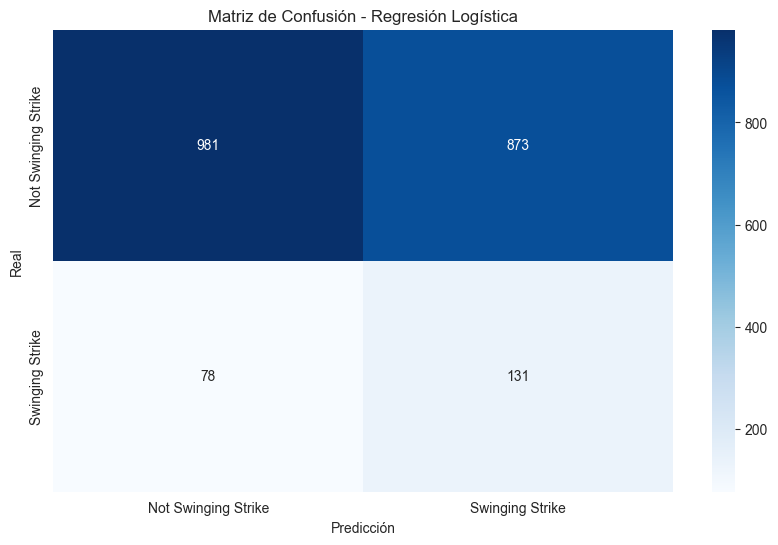

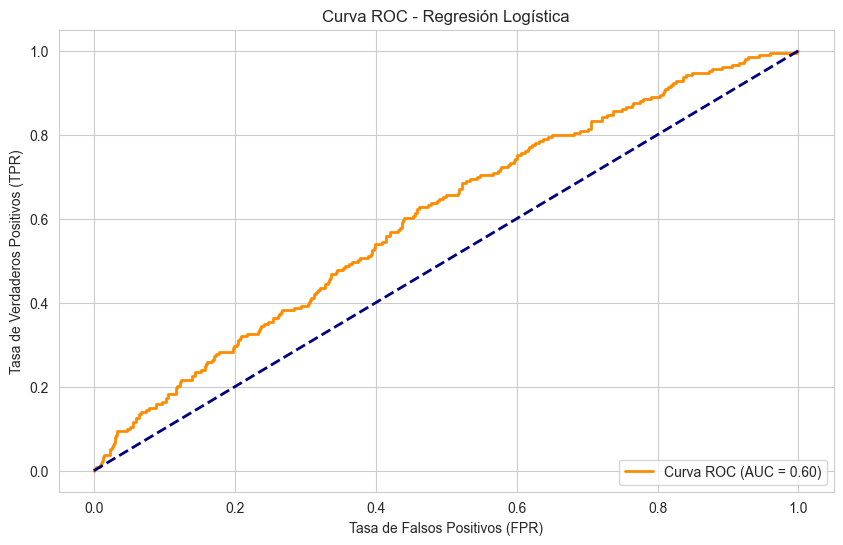


Entrenando Random Forest...
--- Evaluación del Modelo: Random Forest ---
Accuracy: 0.8987
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
AUC-ROC: 0.6955

Reporte de Clasificación:
                         precision    recall  f1-score   support

Not Swinging Strike (0)       0.90      1.00      0.95      1854
    Swinging Strike (1)       0.00      0.00      0.00       209

               accuracy                           0.90      2063
              macro avg       0.45      0.50      0.47      2063
           weighted avg       0.81      0.90      0.85      2063


Matriz de Confusión:


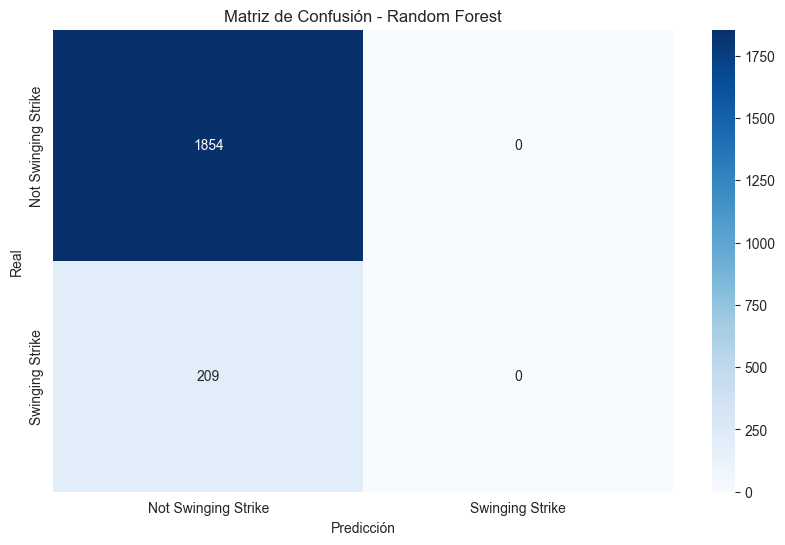

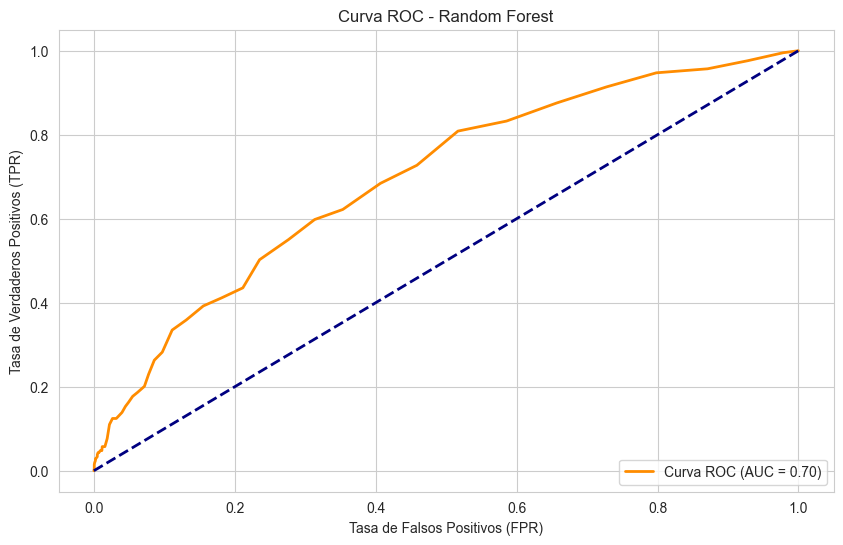


Entrenando LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 836, number of negative: 7413
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3114
[LightGBM] [Info] Number of data points in the train set: 8249, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101346 -> initscore=-2.182362
[LightGBM] [Info] Start training from score -2.182362
--- Evaluación del Modelo: LightGBM ---
Accuracy: 0.7984
Precision: 0.2149
Recall: 0.3732
F1-score: 0.2727
AUC-ROC: 0.7184

Reporte de Clasificación:
                         precision    recall  f1-score   support

Not Swinging Strike (0)       0.92      0.85      0.88      1854
    Swinging Strike (1)       0.21      0.37      0.27       

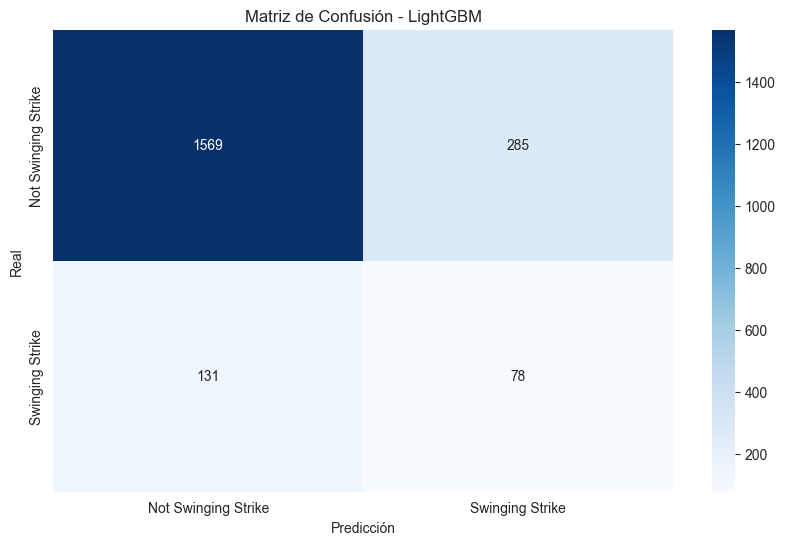

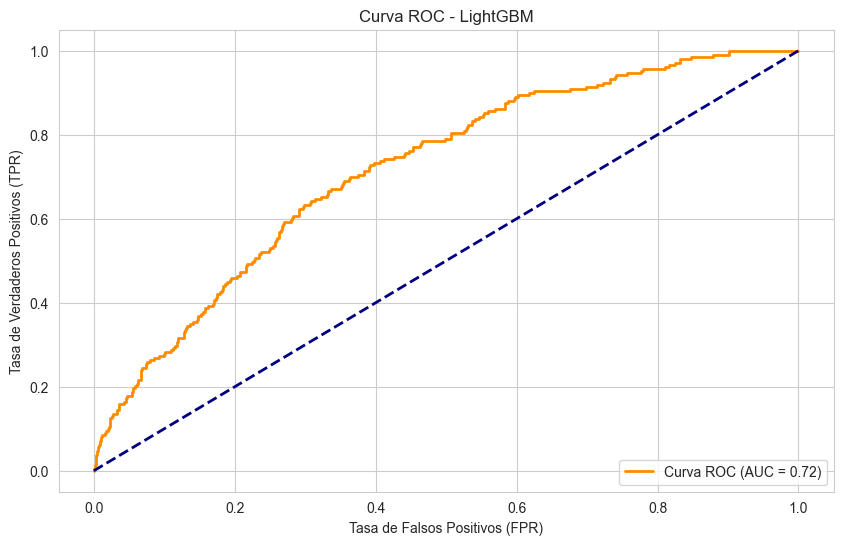


--- Comparación de Resultados de Modelos ---
                     Accuracy  Precision    Recall        F1   AUC-ROC
LightGBM             0.798352   0.214876  0.373206  0.272727  0.718426
Logistic Regression  0.539021   0.130478  0.626794  0.215993  0.602295
Random Forest        0.898691   0.000000  0.000000  0.000000  0.695465

Importancia de Características (LightGBM):


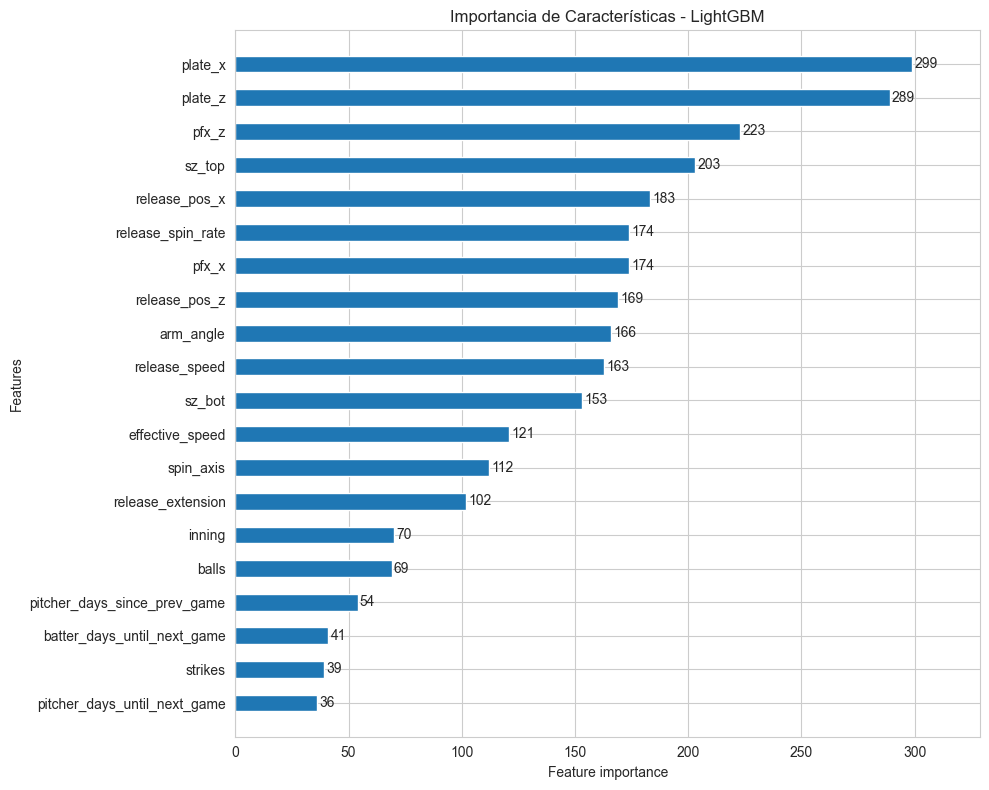

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler # Necesario para Regresión Logística y SVM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Es buena práctica escalar los datos para Regresión Logística y SVM
# X_train y X_test ya están definidos de la celda anterior.
# Creamos copias escaladas para no afectar los datos originales para modelos basados en árboles.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Calcular scale_pos_weight (común para modelos que lo soportan) ---
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_val = neg_count / pos_count
print(f"Calculado scale_pos_weight: {scale_pos_weight_val:.2f}\n")

# --- Diccionario para almacenar resultados ---
model_results = {}

# --- Función de evaluación (reutilizable) ---
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    print(f"--- Evaluación del Modelo: {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred, target_names=['Not Swinging Strike (0)', 'Swinging Strike (1)'], zero_division=0))
    
    print("\nMatriz de Confusión:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Swinging Strike', 'Swinging Strike'], 
                yticklabels=['Not Swinging Strike', 'Swinging Strike'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc_val = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_val:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'AUC-ROC': roc_auc}

# --- 1. Regresión Logística ---
print("Entrenando Regresión Logística...")
log_reg = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=1000)
# 'class_weight=balanced' es otra forma de manejar desbalance.
# Usamos X_train_scaled para Regresión Logística
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
model_results['Logistic Regression'] = evaluate_model(y_test, y_pred_log_reg, y_pred_proba_log_reg, 'Regresión Logística')

# --- 2. Random Forest ---
print("\nEntrenando Random Forest...")
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
# 'class_weight=balanced' también disponible. Usamos X_train (no escalado) para Random Forest.
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
model_results['Random Forest'] = evaluate_model(y_test, y_pred_rf, y_pred_proba_rf, 'Random Forest')

# --- 3. LightGBM ---
print("\nEntrenando LightGBM...")
lgbm_clf = lgb.LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight_val, n_estimators=100)
# Usamos X_train (no escalado) para LightGBM.
lgbm_clf.fit(X_train, y_train)
y_pred_lgbm = lgbm_clf.predict(X_test)
y_pred_proba_lgbm = lgbm_clf.predict_proba(X_test)[:, 1]
model_results['LightGBM'] = evaluate_model(y_test, y_pred_lgbm, y_pred_proba_lgbm, 'LightGBM')

# --- Comparar Resultados ---
results_df = pd.DataFrame(model_results).T.sort_values(by='F1', ascending=False)
print("\n--- Comparación de Resultados de Modelos ---")
print(results_df)

# Graficar importancia de características para el mejor modelo basado en árboles (ej. LightGBM o RF)
# (Aquí se asume que queremos ver las de LightGBM, se puede adaptar)
if 'LightGBM' in model_results: # o el modelo que resulte mejor
    print("\nImportancia de Características (LightGBM):")
    lgb.plot_importance(lgbm_clf, max_num_features=20, height=0.5, figsize=(10,8))
    plt.title('Importancia de Características - LightGBM')
    plt.tight_layout()
    plt.show()
elif 'Random Forest' in model_results:
    print("\nImportancia de Características (Random Forest):")
    importances_rf = rf_clf.feature_importances_
    feature_names_rf = X_train.columns
    forest_importances = pd.Series(importances_rf, index=feature_names_rf).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=forest_importances.head(20), y=forest_importances.head(20).index)
    plt.title("Top 20 Importancia de Características - Random Forest")
    plt.tight_layout()
    plt.show()

Vamos a revisar el rendimiento de Random Forest, ya que en el intento anterior no predijo la clase minoritaria.
1. Entrenaremos Random Forest sin `class_weight='balanced'`.
2. Si eso no mejora, probaremos `BalancedRandomForestClassifier` de `imbalanced-learn`.
Mantendremos la evaluación de Regresión Logística y LightGBM para comparación.

Intentando instalar imbalanced-learn...



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
     ---------- ---------------------------- 61.4/238.4 kB 1.7 MB/s eta 0:00:01
     ----------------------------------- -- 225.3/238.4 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 238.4/238.4 kB 2.1 MB/s eta 0:00:00
imbalanced-learn instalado y BalancedRandomForestClassifier importado.
Calculado scale_pos_weight: 8.87

Entrenando Regresión Logística...
--- Evaluación del Modelo: Regresión Logística ---
Accuracy: 0.5390
Precision: 0.1305
Recall: 0.6268
F1-score: 0.2160
AUC-ROC: 0.6023

Reporte de Clasificación:
                         precision    recall  f1-score   support

Not Swinging Strike (0)       0.93      0.53      0.67      1854
    Swinging Strike (1)       0.13      0.63      0.22       209

               accuracy                           0.54      2063
              macro avg       0.53      0.58      0.44      2063
           weighted avg       0.85      0.54      0.63      

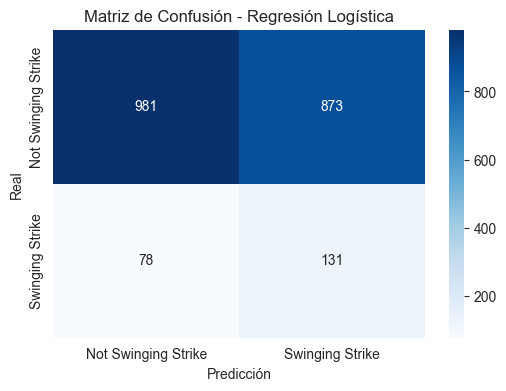


Entrenando Random Forest (sin class_weight)...
--- Evaluación del Modelo: Random Forest (no balanced) ---
Accuracy: 0.8987
Precision: 0.5000
Recall: 0.0048
F1-score: 0.0095
AUC-ROC: 0.6610

Reporte de Clasificación:
                         precision    recall  f1-score   support

Not Swinging Strike (0)       0.90      1.00      0.95      1854
    Swinging Strike (1)       0.50      0.00      0.01       209

               accuracy                           0.90      2063
              macro avg       0.70      0.50      0.48      2063
           weighted avg       0.86      0.90      0.85      2063



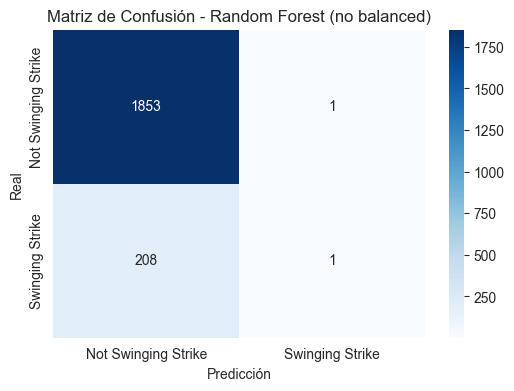


Entrenando BalancedRandomForestClassifier...
--- Evaluación del Modelo: Balanced RF ---
Accuracy: 0.6209
Precision: 0.1688
Recall: 0.6986
F1-score: 0.2719
AUC-ROC: 0.7163

Reporte de Clasificación:
                         precision    recall  f1-score   support

Not Swinging Strike (0)       0.95      0.61      0.74      1854
    Swinging Strike (1)       0.17      0.70      0.27       209

               accuracy                           0.62      2063
              macro avg       0.56      0.66      0.51      2063
           weighted avg       0.87      0.62      0.70      2063



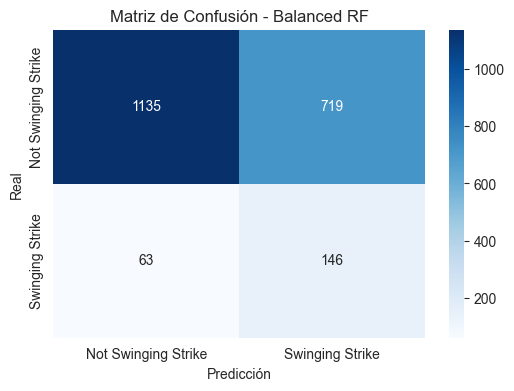


Entrenando LightGBM...
--- Evaluación del Modelo: LightGBM ---
Accuracy: 0.7984
Precision: 0.2149
Recall: 0.3732
F1-score: 0.2727
AUC-ROC: 0.7184

Reporte de Clasificación:
                         precision    recall  f1-score   support

Not Swinging Strike (0)       0.92      0.85      0.88      1854
    Swinging Strike (1)       0.21      0.37      0.27       209

               accuracy                           0.80      2063
              macro avg       0.57      0.61      0.58      2063
           weighted avg       0.85      0.80      0.82      2063



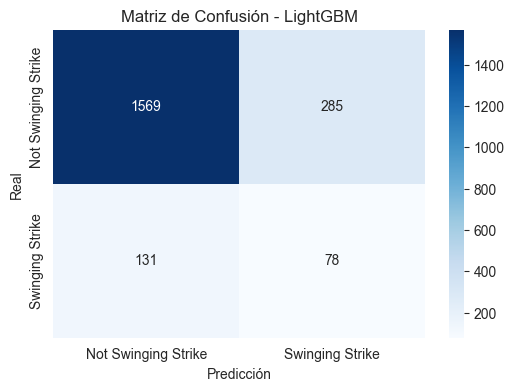


--- Comparación de Resultados de Modelos (Actualizada) ---
                             Accuracy  Precision    Recall        F1   AUC-ROC
LightGBM                     0.798352   0.214876  0.373206  0.272727  0.718426
Balanced RF                  0.620940   0.168786  0.698565  0.271881  0.716258
Logistic Regression          0.539021   0.130478  0.626794  0.215993  0.602295
Random Forest (no balanced)  0.898691   0.500000  0.004785  0.009479  0.660954

Importancia de Características para el mejor modelo: LightGBM


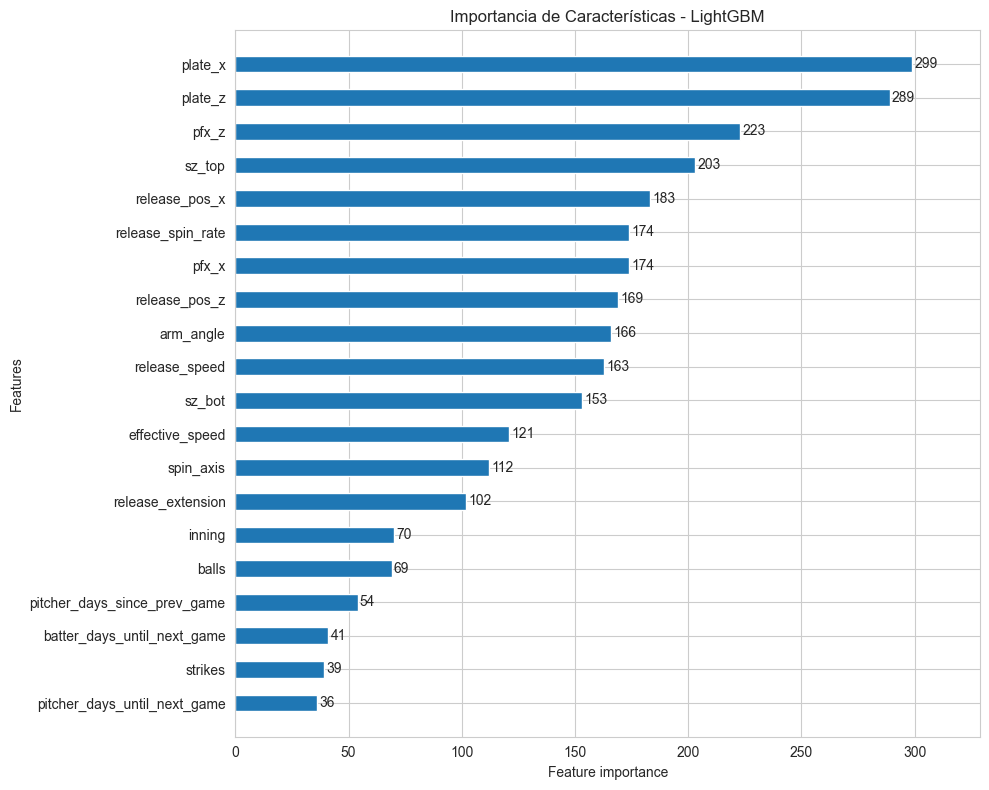

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Intentar instalar imbalanced-learn si no está presente
try:
    from imblearn.ensemble import BalancedRandomForestClassifier
    print("imbalanced-learn ya está instalado.")
except ImportError:
    print("Intentando instalar imbalanced-learn...")
    # En un notebook, el !pip debería funcionar. Si no, debe hacerse desde la terminal.
    import sys
    !{sys.executable} -m pip install imbalanced-learn
    from imblearn.ensemble import BalancedRandomForestClassifier
    print("imbalanced-learn instalado y BalancedRandomForestClassifier importado.")


# Datos (asumimos que X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled ya existen de celdas previas)

# --- Calcular scale_pos_weight (común para modelos que lo soportan) ---
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_val = neg_count / pos_count
print(f"Calculado scale_pos_weight: {scale_pos_weight_val:.2f}\n")

# --- Diccionario para almacenar resultados ---
model_results = {}

# --- Función de evaluación (reutilizable - la misma de antes) ---
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    print(f"--- Evaluación del Modelo: {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred, target_names=['Not Swinging Strike (0)', 'Swinging Strike (1)'], zero_division=0))
    
    # (Omitimos las gráficas dentro de esta función por brevedad en el re-post, pero se pueden mantener)
    # Matriz de Confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4)) # Ajustar tamaño para múltiples plots
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Swinging Strike', 'Swinging Strike'], 
                yticklabels=['Not Swinging Strike', 'Swinging Strike'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

    # Curva ROC (simplificada aquí para no repetir el código completo, se puede añadir si se desea)
    # fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    # roc_auc_val = auc(fpr, tpr)
    # plt.figure() ... (código de la curva ROC) ... plt.show()
    
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'AUC-ROC': roc_auc}

# --- 1. Regresión Logística (sin cambios) ---
print("Entrenando Regresión Logística...")
log_reg = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
model_results['Logistic Regression'] = evaluate_model(y_test, y_pred_log_reg, y_pred_proba_log_reg, 'Regresión Logística')

# --- 2. Random Forest (Primer Intento Revisado: sin class_weight) ---
print("\nEntrenando Random Forest (sin class_weight)...")
rf_clf_v1 = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf_v1.fit(X_train, y_train)
y_pred_rf_v1 = rf_clf_v1.predict(X_test)
y_pred_proba_rf_v1 = rf_clf_v1.predict_proba(X_test)[:, 1]
model_results['Random Forest (no balanced)'] = evaluate_model(y_test, y_pred_rf_v1, y_pred_proba_rf_v1, 'Random Forest (no balanced)')

# --- 3. BalancedRandomForestClassifier (Segundo Intento Revisado para RF) ---
print("\nEntrenando BalancedRandomForestClassifier...")
brf_clf = BalancedRandomForestClassifier(random_state=42, n_estimators=100, sampling_strategy='auto')
# sampling_strategy='auto' es equivalente a 'not minority'
brf_clf.fit(X_train, y_train)
y_pred_brf = brf_clf.predict(X_test)
y_pred_proba_brf = brf_clf.predict_proba(X_test)[:, 1]
model_results['Balanced RF'] = evaluate_model(y_test, y_pred_brf, y_pred_proba_brf, 'Balanced RF')

# --- 4. LightGBM (sin cambios) ---
print("\nEntrenando LightGBM...")
lgbm_clf = lgb.LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight_val, n_estimators=100, verbosity=-1) 
# Añadido verbosity=-1 para reducir logs de LightGBM
# Se encontró un warning "Found whitespace in feature_names, replace with underlines"
# Esto es porque los nombres de las columnas dummies tienen espacios. LightGBM los maneja.
# Podemos sanearlos si se vuelve un problema:
# X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
# X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]
# Por ahora, lo dejamos así.

lgbm_clf.fit(X_train, y_train)
y_pred_lgbm = lgbm_clf.predict(X_test)
y_pred_proba_lgbm = lgbm_clf.predict_proba(X_test)[:, 1]
model_results['LightGBM'] = evaluate_model(y_test, y_pred_lgbm, y_pred_proba_lgbm, 'LightGBM')

# --- Comparar Resultados ---
results_df = pd.DataFrame(model_results).T.sort_values(by='F1', ascending=False)
print("\n--- Comparación de Resultados de Modelos (Actualizada) ---")
print(results_df)

# Graficar importancia de características para el mejor modelo (adaptar según resultados)
# Por ejemplo, si Balanced RF es bueno:
best_model_name = results_df.index[0]
print(f"\nImportancia de Características para el mejor modelo: {best_model_name}")

if best_model_name == 'LightGBM' and 'LightGBM' in model_results:
    lgb.plot_importance(lgbm_clf, max_num_features=20, height=0.5, figsize=(10,8))
    plt.title('Importancia de Características - LightGBM')
    plt.tight_layout()
    plt.show()
elif best_model_name == 'Balanced RF' and 'Balanced RF' in model_results:
    importances_brf = brf_clf.feature_importances_
    feature_names_brf = X_train.columns # Asegúrate que X_train tenga los nombres correctos
    brf_importances = pd.Series(importances_brf, index=feature_names_brf).sort_values(ascending=False)
    plt.figure(figsize=(10, 8))
    sns.barplot(x=brf_importances.head(20), y=brf_importances.head(20).index)
    plt.title("Top 20 Importancia de Características - Balanced RF")
    plt.tight_layout()
    plt.show()
elif best_model_name == 'Random Forest (no balanced)' and 'Random Forest (no balanced)' in model_results:
    importances_rf_v1 = rf_clf_v1.feature_importances_
    feature_names_rf_v1 = X_train.columns
    rf_v1_importances = pd.Series(importances_rf_v1, index=feature_names_rf_v1).sort_values(ascending=False)
    plt.figure(figsize=(10, 8))
    sns.barplot(x=rf_v1_importances.head(20), y=rf_v1_importances.head(20).index)
    plt.title("Top 20 Importancia de Características - Random Forest (no balanced)")
    plt.tight_layout()
    plt.show()